In [19]:
import numpy as np
import cv2
import os
import skimage
import matplotlib.pyplot as plt #importing libraries

In [20]:
def load_images_from_folder(folder): #load the roi images
    ildimg = []
    for i in range(0,600):
        filename = str(i)+".jpg"
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            ildimg.append(img)
    return ildimg

In [21]:
roi_64_rgb = load_images_from_folder("roi_outscribe_64")
roi_32_rgb = load_images_from_folder("roi_outscribe_32")

In [22]:
roi_64 = []
roi_32 = []
for i in range(600):    
    roi_64.append(cv2.cvtColor(roi_64_rgb[i], cv2.COLOR_BGR2GRAY))
    roi_32.append(cv2.cvtColor(roi_32_rgb[i], cv2.COLOR_BGR2GRAY))

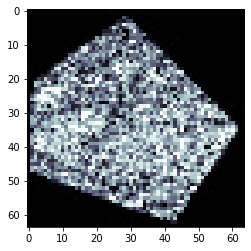

In [23]:
plt.imshow(roi_64[179], cmap=plt.cm.bone)
plt.show()

In [24]:
flip_64 = []
flip_32 = []
for i in range(len(roi_64)):
    flip_64.append(np.fliplr(roi_64[i]))
    flip_32.append(np.fliplr(roi_32[i]))

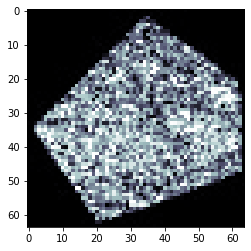

In [25]:
plt.imshow(flip_64[179], cmap=plt.cm.bone)
plt.show()

In [26]:
plus90_64 = []
plus90_32 = []
for i in range(len(roi_64)):
    plus90_64.append(cv2.rotate(roi_64[i], cv2.ROTATE_90_CLOCKWISE))
    plus90_32.append(cv2.rotate(roi_32[i], cv2.ROTATE_90_CLOCKWISE))

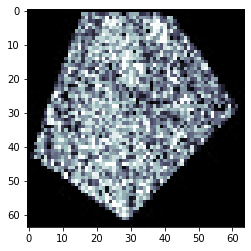

In [27]:
plt.imshow(plus90_64[179], cmap=plt.cm.bone)
plt.show()

In [28]:
minus90_64 = []
minus90_32 = []
for i in range(len(roi_64)):
    minus90_64.append(cv2.rotate(roi_64[i], cv2.ROTATE_90_COUNTERCLOCKWISE))
    minus90_32.append(cv2.rotate(roi_32[i], cv2.ROTATE_90_COUNTERCLOCKWISE))

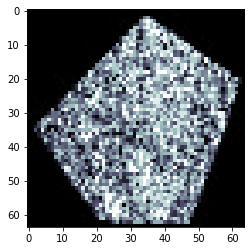

In [29]:
plt.imshow(minus90_64[179], cmap=plt.cm.bone)
plt.show()

In [30]:
plus180_64 = []
plus180_32 = []
for i in range(len(roi_64)):
    plus180_64.append(cv2.rotate(roi_64[i], cv2.ROTATE_180))
    plus180_32.append(cv2.rotate(roi_32[i], cv2.ROTATE_180))

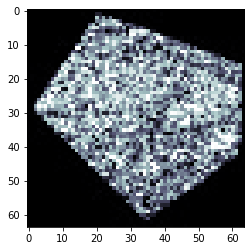

In [31]:
plt.imshow(plus180_64[179], cmap=plt.cm.bone)
plt.show()

In [32]:
from skimage.transform import rescale
scaled2_64 = []
scaled2_32 = []
for i in range(len(roi_64)):
    scaled2_64.append(skimage.transform.rescale(roi_64[i], scale=2.0, mode='constant')[32:96,32:96])
    scaled2_32.append(skimage.transform.rescale(roi_32[i], scale=2.0, mode='constant')[16:48,16:48])

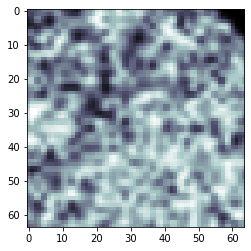

In [33]:
plt.imshow(scaled2_64[179], cmap=plt.cm.bone)
plt.show()

In [34]:
aug_64 = []
aug_32 = []
aug_64 = np.concatenate((roi_64,flip_64,plus90_64,minus90_64,plus180_64,scaled2_64))
aug_32 = np.concatenate((roi_32,flip_32,plus90_32,minus90_32,plus180_32,scaled2_32))

In [35]:
path = './augmented_data_64' #saving these images in a folder
for i in range(len(aug_64)):
    cv2.imwrite(os.path.join(path,str(i)+'.jpg'), aug_64[i])
    cv2.waitKey(0)

In [36]:
path = './augmented_data_32' #saving these images in a folder
for i in range(len(aug_32)):
    cv2.imwrite(os.path.join(path,str(i)+'.jpg'), aug_32[i])
    cv2.waitKey(0)